# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [2]:
# Get the datasets
#!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
#!wget http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0  37202      0 --:--:-- --:--:-- --:--:-- 38375
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0  20365      0 --:--:-- --:--:-- --:--:-- 40628


In [2]:
# Take a peek at the datasets
#!head train.dat
#!head test.dat

### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = [list(map(int, instance.strip().split('\t')))]
        # Add a dummy input so that w0 becomes the bias
        instance = [[-1] + instance[0]]
        data += instance
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    dot_product = 0    
    for i in  range(len(array1)):                 
        dot_product += array1[i]*array2[i]
    return dot_product


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1/(1+ math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weights, instance):
    #TODO: return the output of the model
    output = sigmoid((dot_product(weights, instance)))
    return output

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    pred_output = 0
    for i in range(len(weights)):
        pred_output += weights[i]*instance[i]
    return 1 if pred_output >=0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Set the weights array to zero, every element in the array is set to zero (initilization of the weights array)
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # compute dot products, this is the sum of every input *  its weight
            in_value = dot_product(weights, instance) 
            #Conpute the output by applying the activation function
            output = sigmoid(in_value)  
            #Compute or defining the error which is the difference between the true output and the predicted output
            error = instance[-1] - output            
            #TODO: name these steps
            #Updating the weights(new weights to replace previous ones in the weights array) based on the error calculations
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]
    # Defining  a new weights for the next iterative prediction, this is how the model learn from the data to adjust the weights
    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.




### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

The output = sigmoid(in_value) will yield an output that could be any real number, continous number;however output = predict(weights, instance) will yield an output of either 0 or 1. The purpose of sigmoid function is to provide nonlinear prediction, which could fit some data set, especially nonlinear dataset. Therefore using the first approach will produce continously differenciable outputs


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 

# Code for training the model using below hyperparameters
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
    
# Output of above code

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 72.0
#tr: 300, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 400, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 200, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 400, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 72.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0

# Second loop using different hyperparemeters (changed number of epochs)
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [100, 125, 150, 175, 200]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

# Output
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 72.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0

#tr: 20, epochs: 125, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 125, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 125, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 125, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs: 125, learning rate: 0.005; Accuracy (test, 100 instances): 72.0
#tr: 400, epochs: 125, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs: 125, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 125, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 125, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 125, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 300, epochs: 125, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 125, learning rate: 0.010; Accuracy (test, 100 instances): 75.0
#tr: 20, epochs: 125, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 40, epochs: 125, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 100, epochs: 125, learning rate: 0.050; Accuracy (test, 100 instances): 73.0
#tr: 200, epochs: 125, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 125, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 125, learning rate: 0.050; Accuracy (test, 100 instances): 78.0

#tr: 20, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 400, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 20, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 40, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 73.0
#tr: 300, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 75.0
#tr: 20, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 40, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 200, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 79.0

#tr: 20, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 300, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 400, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 72.0
#tr: 20, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 40, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 75.0
#tr: 400, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 75.0
#tr: 20, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 40, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 73.0
#tr: 200, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 300, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 80.0

#tr: 20, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 400, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 40, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 76.0
#tr: 400, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 75.0
#tr: 20, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 40, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 72.0
#tr: 200, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 80.0



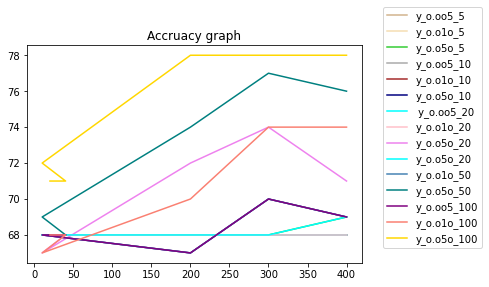

In [26]:
import matplotlib.pyplot as plt

#Number of training data set
x = [20, 40, 10, 200, 300, 400]   

# Accuracy value per learning rate and number of epoch (y_o.005_5 means accuracy for lr of 0.005 and  number of epoch of 5)
y1 = [68, 68, 68, 68, 68, 68]  # y_o.oo5_5
y2 = [68, 68, 68, 68, 68, 68] # y_o.o1o_5
y3 = [68, 68, 68, 68, 68, 69]   # y_o.o5o_5
y4 = [68, 68, 68, 68, 68, 68]    #y_o.oo5_10
y5 = [68, 68, 68, 68, 68, 68]  # y_o.o1o_10
y6 = [68, 68, 68, 67, 70, 69] # y_o.o5o_10
y7 = [68, 68, 68, 68, 68, 68] # y_o.oo5_20
y8 = [68, 68, 68, 68, 68, 68] # y_o.o1o_20
y9 = [68, 68, 67, 72, 74, 71] # y_o.o5o_20
y10 = [68, 68, 68, 68, 68, 69] # y_o.o5o_20
y11 = [68, 68, 68, 67, 70, 69] # y_o.o1o_50
y12 = [68, 68, 69, 74, 77, 76] # y_o.o5o_50
y13 = [68, 68, 68, 67, 70, 69] #y_o.oo5_100
y14 = [68, 68, 67, 70, 74, 74] # y_o.o1o_100
y15= [71, 71, 72, 78, 78, 78] # y_o.o5o_100
# plot each epoch accuracy with the number of dataset
plt.plot(x, y1, 'tan', label = "y_o.oo5_5")
plt.plot(x, y2, 'wheat', label = "y_o.o1o_5")
plt.plot(x, y3, 'limegreen', label = "y_o.o5o_5")
plt.plot(x, y4, 'darkgray', label = "y_o.oo5_10")
plt.plot(x, y5, 'brown', label = "y_o.o1o_10")
plt.plot(x, y6, 'navy', label = "y_o.o5o_10")
plt.plot(x, y7, 'aqua', label = " y_o.oo5_20")
plt.plot(x, y8, 'pink', label = "y_o.o1o_20")
plt.plot(x, y9, 'violet', label = "y_o.o5o_20")
plt.plot(x, y10, 'cyan', label = "y_o.o5o_20")
plt.plot(x, y11, 'steelblue', label = "y_o.o1o_50")
plt.plot(x, y12, 'teal', label = "y_o.o5o_50")
plt.plot(x, y13, 'purple', label = "y_o.oo5_100")
plt.plot(x, y14, 'salmon', label = "y_o.o1o_100")
plt.plot(x, y15, 'gold', label = "y_o.o5o_100")

#plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
plt.title('Accruacy graph')
plt.show()
# show the plot
plt.show()



### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)
#############Answers are at the begining, codes are at the bottom########################################
A- I trained the model using one set of hyperparmeters, and after that I increaded the number of epochs and train the model again. For the first set of hyperparameters (please the graph of accruacy at the cell above), the graph clearly shows that there is no need to use all the training dataset to train the model. From all the 15 combinaisons, almost most of them have their accuracy either constant or dropped after 75% of training dataset. Thus, to get the highest accuracy does not necessary means using all the training dataset.
###########################################################################################################
B- The fact that the second run obtains worse accruacy than the first one (despite the second one uses more training data) means that more data can produced double descent effect, therefore rather decreasing the accruacy. The optimization of the training lies on the optimum data set needed to produce the highest accrucay. I am really new to machine learning and deep learning, so my understanding might be very basic. My little understanding for this phenomenon is that more data produces accurate model; however, there are other hyperparameters that could also influence the accruacy. COmparing the two outpus above for question b, they have different learning rate. Though the seonc run uses more data, it has a lower learning rate, meaning it will take more time or run to get closer to the best accruacy. In our case, the number of epoch is also small, therefore the wieghts change made was too small to improve on the accuracy. 
#############################################################################################################

C-It is possible to get higher accuracy with additional hyperparameters. For instance adding more epochs to the epochs array increases the accrucay to 80% (see code and output below).However, adding more epochs did not improve the accuracy more than 80%. I also add three more learning rate (0.1, 0.5, 0.75). Though only one combination yielded an accruacy of 80%, the accuracy did not go beyond 80%. Based on the results of adding addtional hyperparameters, I could assume that adding additional hyperparameters might not accuracy higher than 80%

##############################################################################################################

D-Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
Based on the results for adding additional epochs, it is not always worth training for more epochs whille keeping all other hyperparameters fixed. The code and output below proved that with 175epochs, 200 epochs, and 250 epochs all yielding 80% of highest accuracy. This meanis that increasing epochs and leaving other hyperparameters fixed are not always worth. 

#################################Codes and outputs for above questions################################
##########Plotting the accuracy for all the combinations of hyperparameters code and output)############

import matplotlib.pyplot as plt
#Number of training data set
x = [20, 40, 10, 200, 300, 400]   

# Accuracy value per learning rate and number of epoch (y_o.005_5 means accuracy for lr of 0.005 and  number of epoch of 5)
y1 = [68, 68, 68, 68, 68, 68]  # y_o.oo5_5
y2 = [68, 68, 68, 68, 68, 68] # y_o.o1o_5
y3 = [68, 68, 68, 68, 68, 69]   # y_o.o5o_5
y4 = [68, 68, 68, 68, 68, 68]    #y_o.oo5_10
y5 = [68, 68, 68, 68, 68, 68]  # y_o.o1o_10
y6 = [68, 68, 68, 67, 70, 69] # y_o.o5o_10
y7 = [68, 68, 68, 68, 68, 68] # y_o.oo5_20
y8 = [68, 68, 68, 68, 68, 68] # y_o.o1o_20
y9 = [68, 68, 67, 72, 74, 71] # y_o.o5o_20
y10 = [68, 68, 68, 68, 68, 69] # y_o.o5o_20
y11 = [68, 68, 68, 67, 70, 69] # y_o.o1o_50
y12 = [68, 68, 69, 74, 77, 76] # y_o.o5o_50
y13 = [68, 68, 68, 67, 70, 69] #y_o.oo5_100
y14 = [68, 68, 67, 70, 74, 74] # y_o.o1o_100
y15= [71, 71, 72, 78, 78, 78] # y_o.o5o_100

# plot each epoch accuracy with the number of dataset
plt.plot(x, y1, 'tan', label = "y_o.oo5_5")
plt.plot(x, y2, 'wheat', label = "y_o.o1o_5")
plt.plot(x, y3, 'limegreen', label = "y_o.o5o_5")
plt.plot(x, y4, 'darkgray', label = "y_o.oo5_10")
plt.plot(x, y5, 'brown', label = "y_o.o1o_10")
plt.plot(x, y6, 'navy', label = "y_o.o5o_10")
plt.plot(x, y7, 'aqua', label = " y_o.oo5_20")
plt.plot(x, y8, 'pink', label = "y_o.o1o_20")
plt.plot(x, y9, 'violet', label = "y_o.o5o_20")
plt.plot(x, y10, 'cyan', label = "y_o.o5o_20")
plt.plot(x, y11, 'maroon', label = "y_o.o1o_50")
plt.plot(x, y12, 'teal', label = "y_o.o5o_50")
plt.plot(x, y13, 'purple', label = "y_o.oo5_100")
plt.plot(x, y14, 'salmon', label = "y_o.o1o_100")
plt.plot(x, y15, 'gold', label = "y_o.o5o_100")

#plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
plt.show()
# show the plot
plt.show()

###########################Adding more number of epochs to the hyperparameters (150, 175, 200, 250)

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
#num_epochs = [5, 10, 20, 50, 100, 150, 200, 250, 300]     # number of epochs

lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
    #output, for simplicity I only display the results of the last three epochs#
 #tr: 20, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 400, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 20, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 40, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 73.0
#tr: 300, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 75.0
#tr: 20, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 40, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 200, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 79.0

#tr: 20, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 300, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 400, epochs: 175, learning rate: 0.005; Accuracy (test, 100 instances): 72.0
#tr: 20, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 40, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 75.0
#tr: 400, epochs: 175, learning rate: 0.010; Accuracy (test, 100 instances): 75.0
#tr: 20, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 40, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 73.0
#tr: 200, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 300, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 175, learning rate: 0.050; Accuracy (test, 100 instances): 80.0

#tr: 20, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 400, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 40, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 76.0
#tr: 400, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 75.0
#tr: 20, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 40, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 72.0
#tr: 200, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
   
   
 ####Adding increaing learning rate #################
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs     
lr_array = [0.005, 0.01, 0.05, 0.1, 0.5, 0.75]  # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
         f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
##output
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 72.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 20, epochs: 100, learning rate: 0.100; Accuracy (test, 100 instances): 66.0
#tr: 40, epochs: 100, learning rate: 0.100; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.100; Accuracy (test, 100 instances): 72.0
#tr: 200, epochs: 100, learning rate: 0.100; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.100; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 100, learning rate: 0.100; Accuracy (test, 100 instances): 78.0
#tr: 20, epochs: 100, learning rate: 0.500; Accuracy (test, 100 instances): 62.0
#tr: 40, epochs: 100, learning rate: 0.500; Accuracy (test, 100 instances): 60.0
#tr: 100, epochs: 100, learning rate: 0.500; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.500; Accuracy (test, 100 instances): 75.0
#tr: 300, epochs: 100, learning rate: 0.500; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 100, learning rate: 0.500; Accuracy (test, 100 instances): 78.0
#tr: 20, epochs: 100, learning rate: 0.750; Accuracy (test, 100 instances): 62.0
#tr: 40, epochs: 100, learning rate: 0.750; Accuracy (test, 100 instances): 59.0
#tr: 100, epochs: 100, learning rate: 0.750; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.750; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.750; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.750; Accuracy (test, 100 instances): 78.0
